# Practica Final
Modulo 4 - Máster Data Science y Business Analytics
Sergio Hervás Aragón

### Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import missingno as msno
from sklearn.datasets import make_blobs
from sklearn.metrics import roc_curve


## 1. EDA

### 1.1. Carga de datos

In [2]:
# Declaración de una variable, la que se encargara de guardar nuestros registros
df = []
file = './caso_final_small_20k_con_mes.csv'
df = pd.read_csv(file, sep=',')
df

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
0,201901,232.121597,10.186000,0.000000,4523.0,1183.0,28.0,232.121597,39.0,54.0,...,21.683399,0,1.767800,0,100.0,2,1,0.0,0.264612,0
1,201911,18280.292969,32.005001,26.450001,13288.0,9194.0,49.0,18280.292969,25.0,152.0,...,166.050007,435,5.555000,0,100.0,1,2,0.0,0.380171,0
2,201906,2141.692810,37.442001,31.400000,13.0,13.0,0.0,2141.692810,47.0,4.0,...,108.850102,0,2.042002,0,100.0,2,2,0.0,0.156041,0
3,202006,3181.986496,20.001000,16.530000,0.0,0.0,0.0,3181.986496,43.0,0.0,...,65.799899,0,3.471001,0,100.0,2,3,0.0,0.228810,1
4,202001,25626.083984,37.005001,26.450001,72783.0,27609.0,151.0,25626.083984,40.0,329.0,...,519.683305,1,5.555000,0,100.0,1,1,0.0,0.210286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,202006,20431.367188,21.640001,16.530001,8226.0,4699.0,61.0,20431.367188,39.0,163.0,...,123.550202,1063,3.756000,0,100.0,1,2,0.0,0.180917,1
19996,202010,2717.812500,36.593000,23.969999,22401.0,7645.0,33.0,2717.812500,70.0,87.0,...,124.883500,0,6.351001,0,100.0,1,1,0.0,0.171539,1
19997,202007,21.569700,9.544000,0.000000,1.0,1.0,0.0,21.569700,52.0,1.0,...,6.500000,0,1.656100,0,100.0,1,1,0.0,0.201103,0
19998,202007,16230.392578,32.005001,26.450001,3545.0,2600.0,8.0,16230.392578,40.0,36.0,...,241.733403,1,5.555000,0,100.0,1,1,0.0,0.274430,1


### 1.2. Descripción y Análisis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MES                                   20000 non-null  int64  
 1   MB_TOTALES                            19741 non-null  float64
 2   FACTURACION_TOTAL_IMPUESTOS           19924 non-null  float64
 3   FACTURACION_CUOTA                     19924 non-null  float64
 4   SEGUNDOS_LLAMADA_RED_PROPIA           19843 non-null  float64
 5   SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  19843 non-null  float64
 6   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  19843 non-null  float64
 7   MB_MENSUALES                          19749 non-null  float64
 8   EDAD                                  19971 non-null  float64
 9   NUM_LLAMADAS_RED_PROPIA               19843 non-null  float64
 10  FACTURACION_TOTAL_SIN_IMPUESTOS       19924 non-null  float64
 11  NUM_LINEAS_PRIN

Observaciones:

- Columnas con valores nulos
- Diferentes tipos de datos (float64, int64)


In [4]:
df.describe()

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
count,20000.000000,19741.000000,19924.000000,19924.000000,19843.000000,19843.000000,19843.000000,19749.000000,19971.000000,19843.000000,...,19749.000000,20000.000000,19924.000000,20000.00000,19737.000000,20000.000000,20000.000000,19918.000000,18677.000000,20000.000000
mean,201948.470400,12307.320625,40.939452,25.179305,19282.843471,10334.947941,62.941239,12288.026161,43.990937,156.408456,...,361.817034,148.792200,5.657482,0.00785,99.975217,1.432750,1.792750,0.913010,0.257017,0.311050
std,49.255692,20115.499610,30.326117,13.067181,31773.406451,18971.928733,93.528782,20112.795794,14.125926,227.913588,...,543.391221,476.199046,3.552509,0.10435,1.284268,0.756972,1.329882,30.432569,0.073077,0.462935
min,201901.000000,0.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,...,0.000000,0.000000,-1.190000,0.00000,0.000000,1.000000,0.000000,0.000000,0.039562,0.000000
25%,201905.000000,1929.673340,24.999000,15.700000,1777.000000,705.500000,11.000000,1915.529785,33.000000,29.000000,...,64.999998,0.000000,3.297000,0.00000,100.000000,1.000000,1.000000,0.000000,0.199451,0.000000
50%,201911.000000,5931.522949,33.004000,23.969999,8011.000000,3631.000000,36.000000,5898.413086,43.000000,87.000000,...,178.966798,1.000000,5.034000,0.00000,100.000000,1.000000,1.000000,0.000000,0.261877,0.000000
75%,202005.000000,16013.454310,50.124250,26.460000,23009.500000,11846.500000,82.000000,15967.201660,54.000000,199.000000,...,443.583287,2.000000,6.768002,0.00000,100.000000,2.000000,2.000000,0.000000,0.296955,1.000000
max,202011.000000,853613.593750,1246.438000,133.890000,584239.000000,422724.000000,6220.000000,853613.593750,98.000000,12497.000000,...,12316.250395,4056.000000,93.483509,4.00000,100.000000,8.000000,18.000000,2089.316758,0.380171,1.000000


<Axes: >

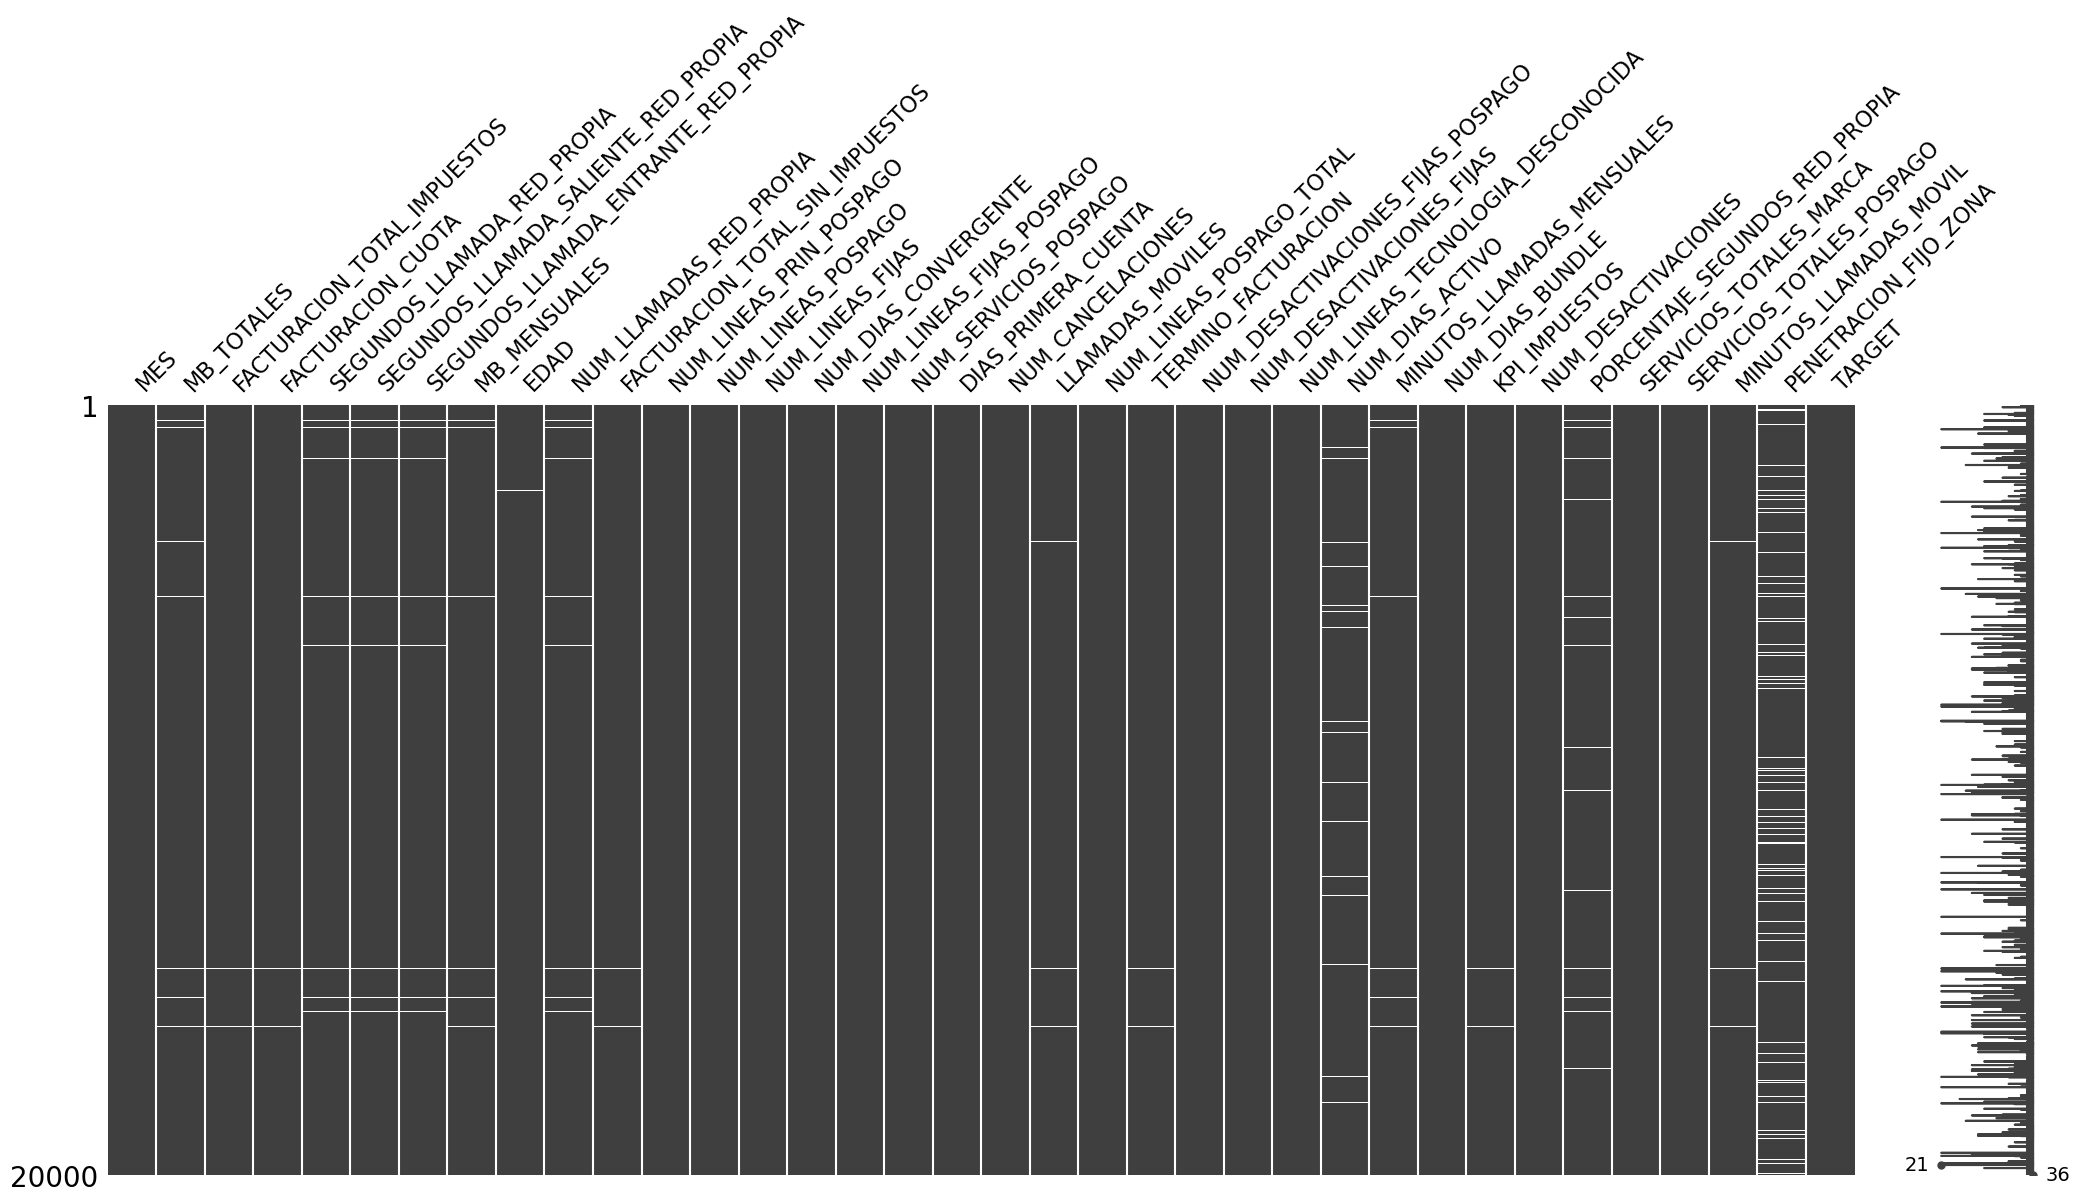

In [5]:
msno.matrix(df)

Observaciones:

Mostramos una matriz de calor para visualizar las variables con mayor preencia de valores perdidos, donde las lineas blancas indican los valores faltantes en cada columna.

Referencias:

 - [guia-sobre-tecnicas-de-imputacion-de-datos-con-python](https://cesarquezadab.com/2021/09/19/guia-sobre-tecnicas-de-imputacion-de-datos-con-python/)


### 1.3. Distribucion de la variable objetivo

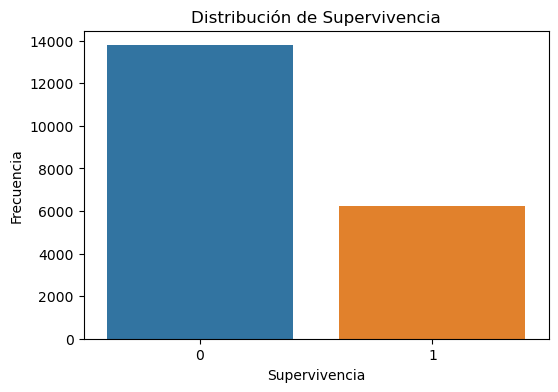

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TARGET')
plt.title('Distribución de Supervivencia')
plt.xlabel('Supervivencia')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

### 1.4. Tratamiento de nulos mediante imputación

<Axes: >

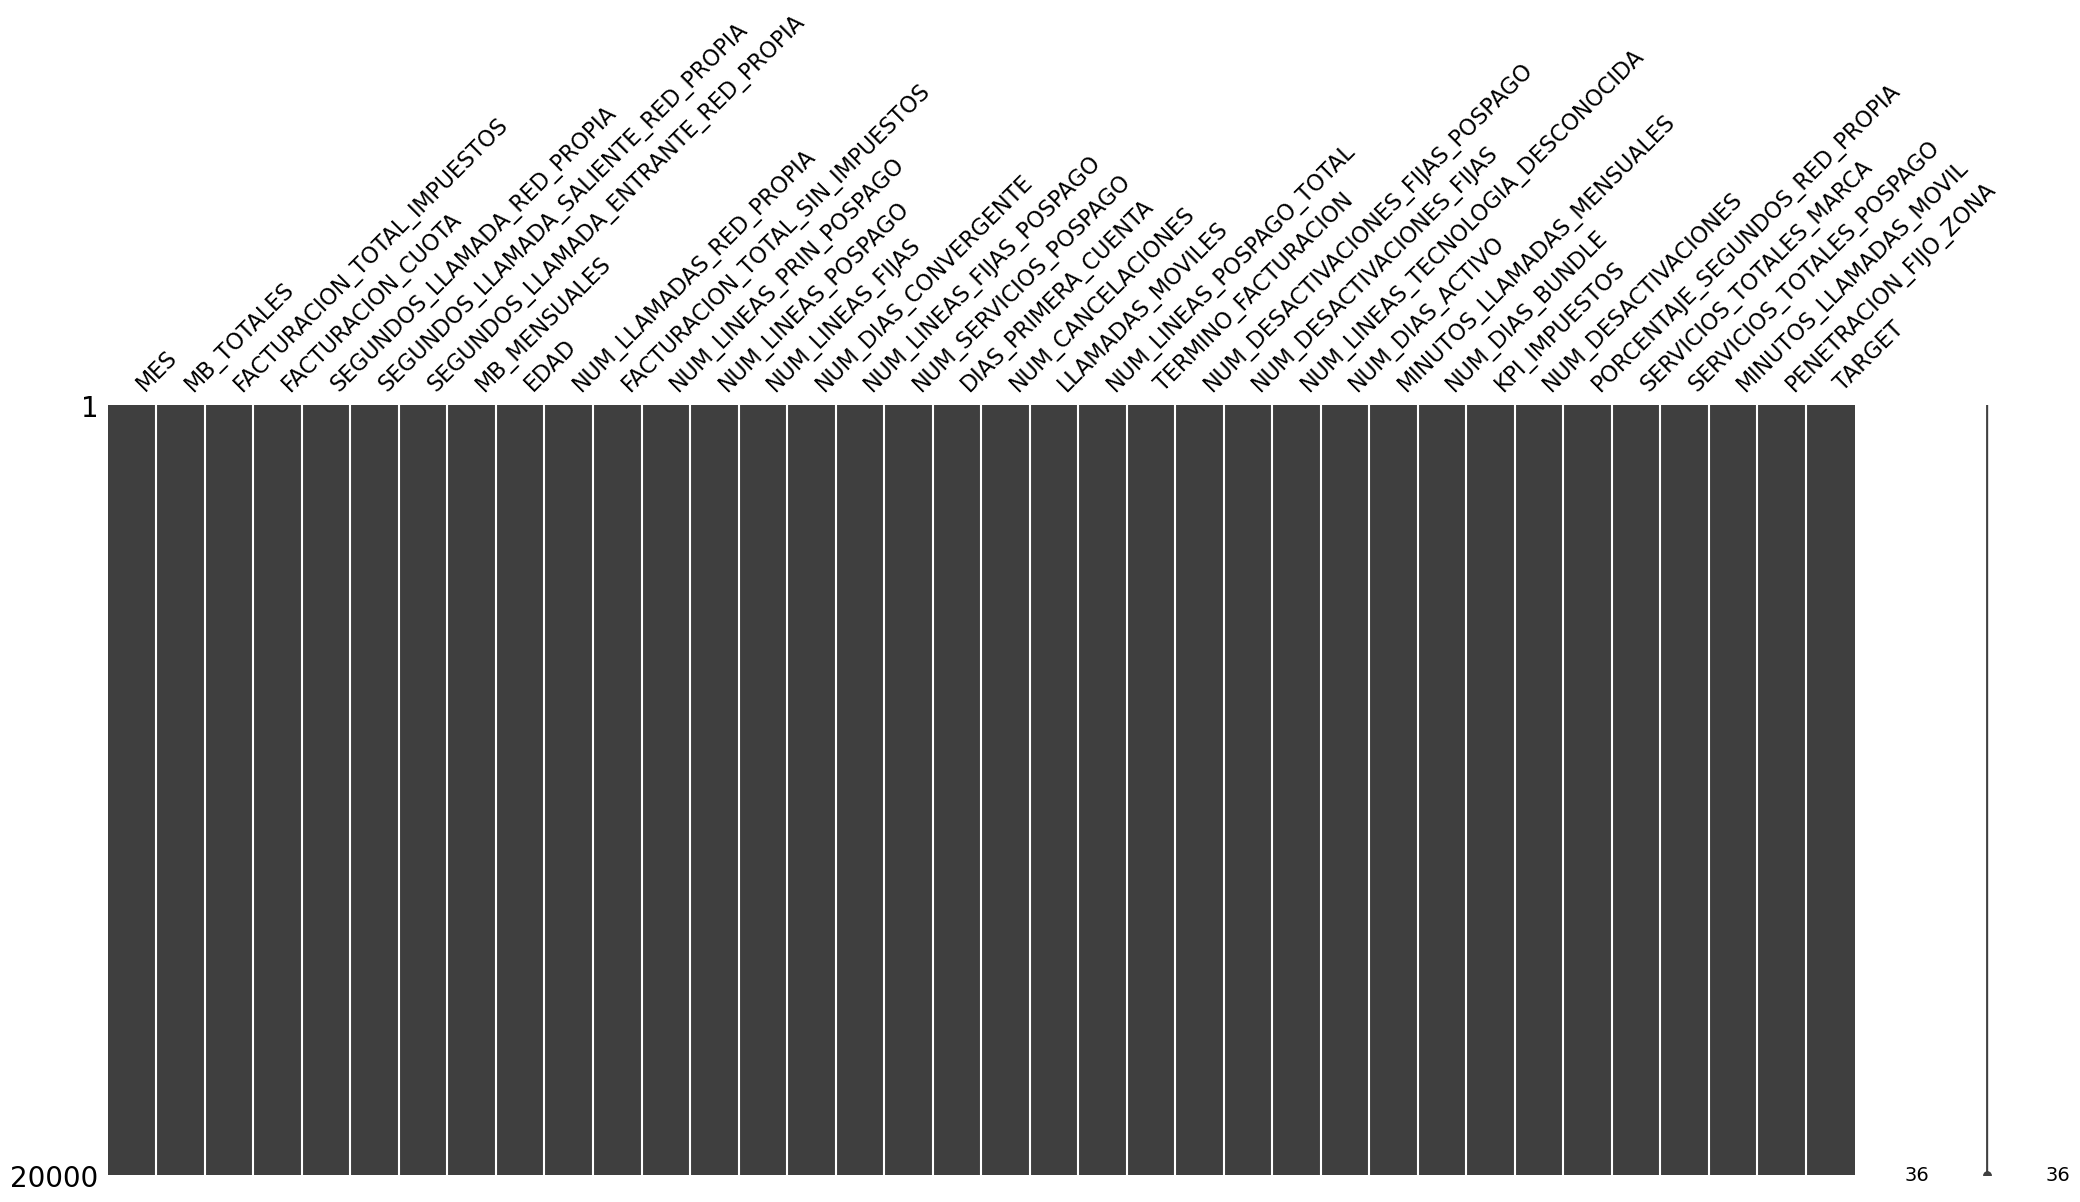

In [7]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
msno.matrix(df)

Observaciones:

 Uso de KNNInputer, la cual consiste en asignar a cada dato nulo un valor obtenido a partir de la información disponible de los 5 vecinos más cercanos o parecidos a este.

Referencias

 - [guia-sobre-tecnicas-de-imputacion-de-datos-con-python](https://cesarquezadab.com/2021/09/19/guia-sobre-tecnicas-de-imputacion-de-datos-con-python/)

 - [Impacto de estrategias](https://rephip.unr.edu.ar/server/api/core/bitstreams/b8e75f0e-1df0-462f-b309-43eeaf0fdcbc/content#:~:text=KNN%20es%20un%20m%C3%A9todo%20eficiente,este%20(donantes%20o%20vecinos).)

 - Documentación vista en clase (Clasificación_Titanic.ipynb)

### 1.4. Outliers

In [8]:
clf = LocalOutlierFactor(n_neighbors=20, contamination='auto')
y_pred = clf.fit_predict(df)
n_outliers = sum(y_pred==-1)
n_total = len(y_pred)
X_scores = clf.negative_outlier_factor_
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
print(u'El número de outliers detectados es de {} de un total de {}'.format(n_outliers, n_total))

El número de outliers detectados es de 469 de un total de 20000


Referencias

 - [LocalOutlierFactor](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection)

### 1.5. Análisis de correlación

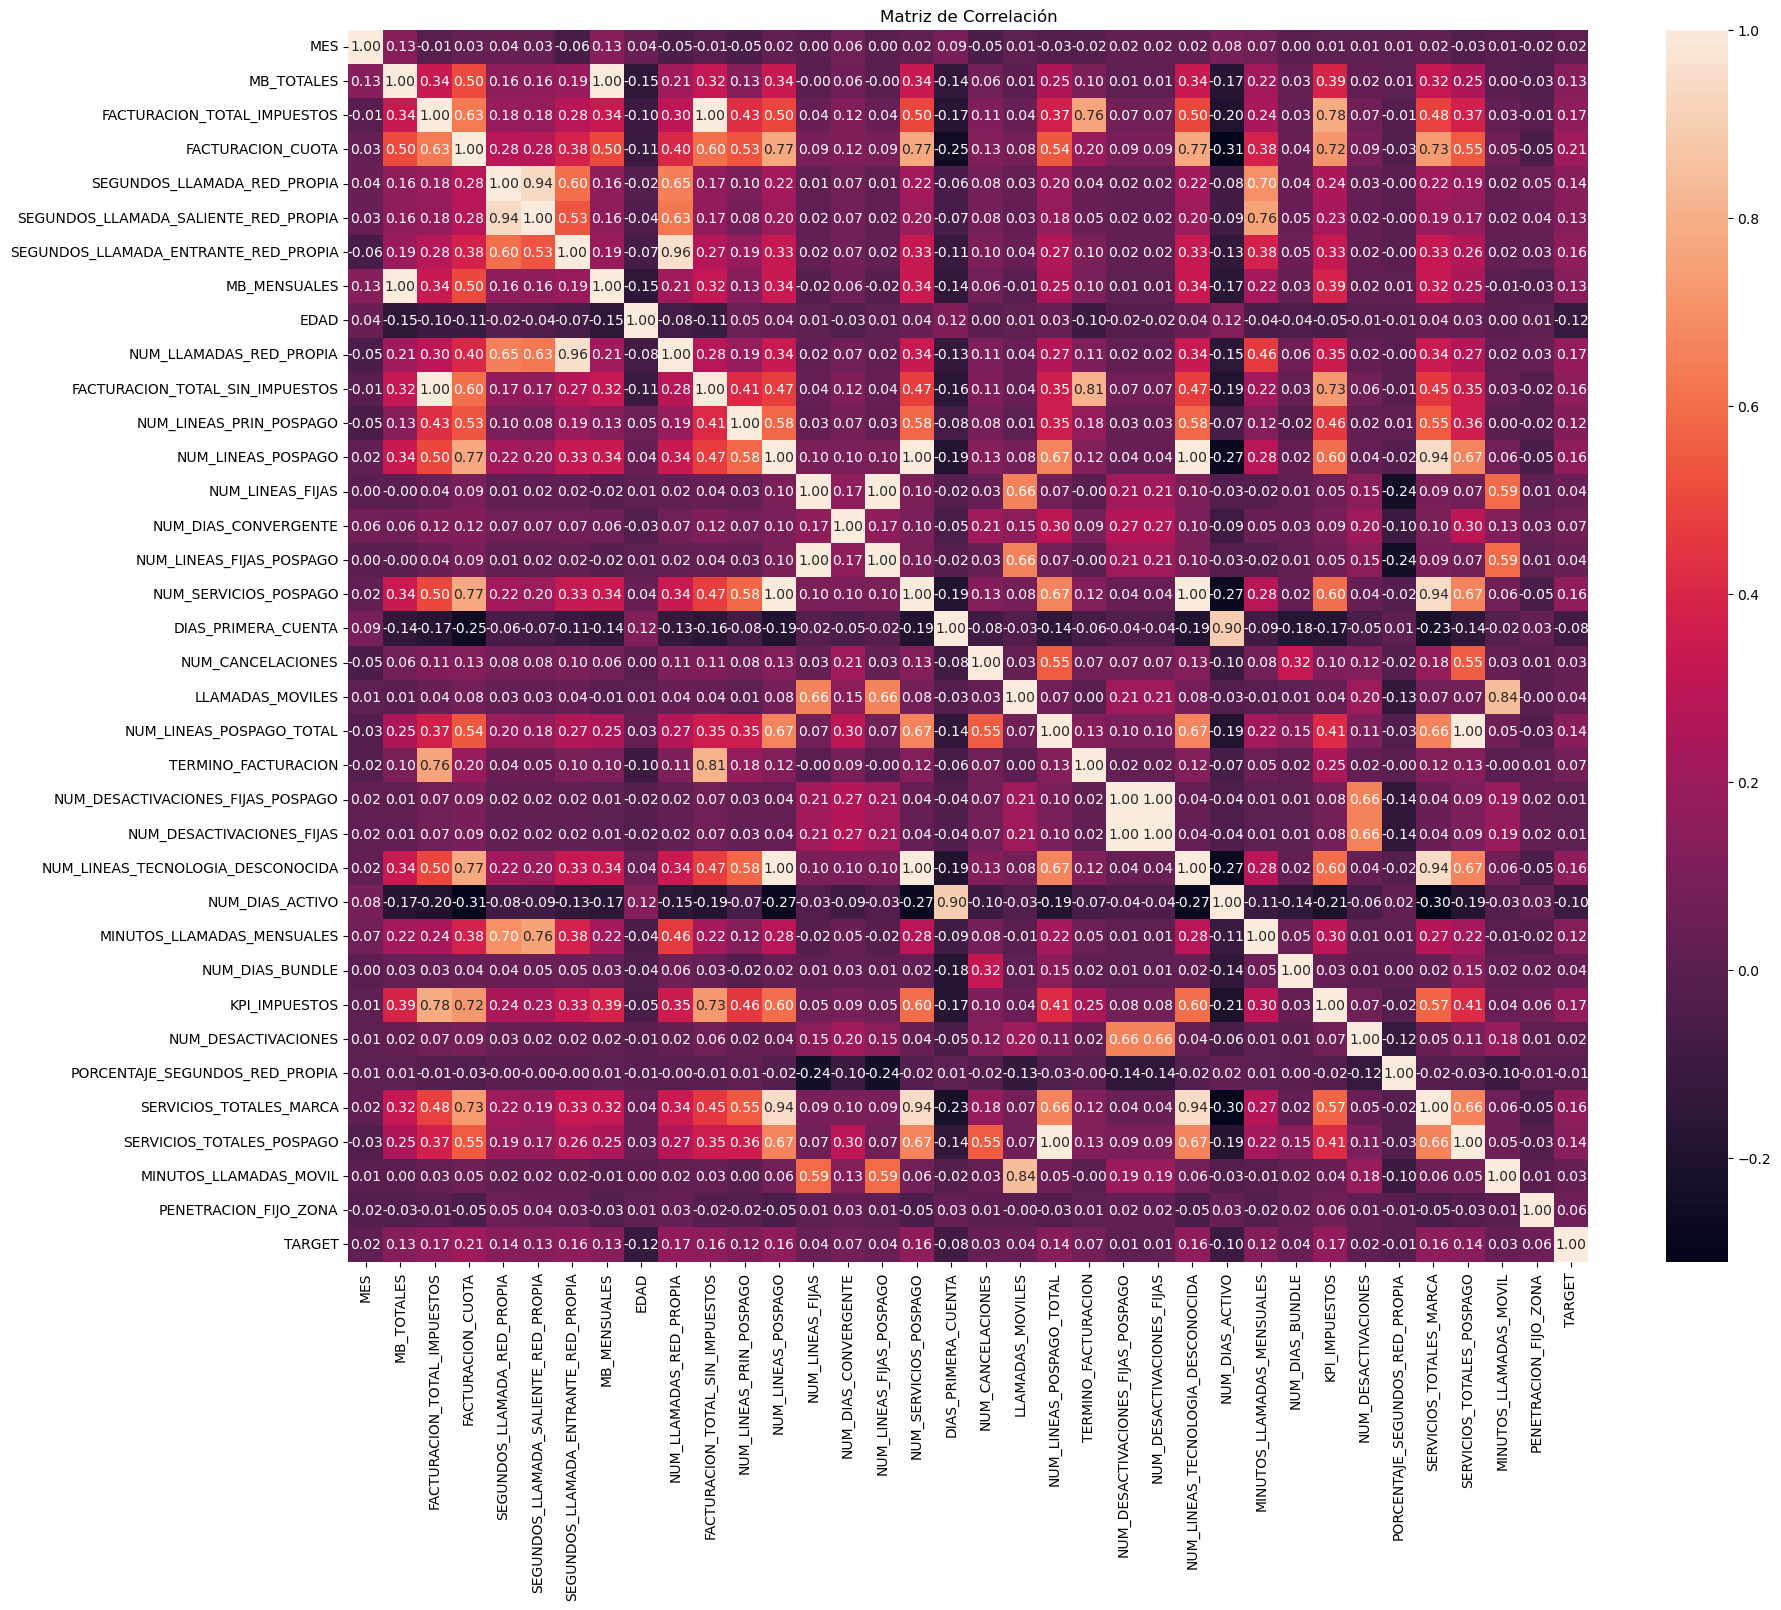

In [9]:
matriz_correlaciones = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(matriz_correlaciones, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Observaciones:

Interpretación de colores: 
 - MB_TOTALES se mide en meses (correlación 1 respecto MB_MENSUALES)
 - Los usuarios que se crean recientemente una cuenta suelen estar muy activos
 - Cuantos más errores en el servicio(NUM_DIAS_BUNDLE), menos actividad (NUM_DIAS_ACTIVO)
 - [...]

Referencias:

 - Documentación vista en clase (Regresion_PrecioDiamantes.ipynb)

 - [Interpretación de correlación](https://www.cimec.es/coeficiente-correlacion-pearson/#:~:text=Un%20valor%20mayor%20que%200,una%20relaci%C3%B3n%20lineal%20positiva%20perfecta.)
 

## 2. Preparación de los datos para el modelado

### 2.1. Selección de variables de entrenamiento.

In [10]:
x = df.drop(['TARGET', 'MES'], axis=1)
y = df['TARGET']

### 2.2. Estandarización

In [11]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_estandarizado = pd.DataFrame(x_scaled, columns=x.columns)
x_estandarizado

,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,...,NUM_DIAS_ACTIVO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA
0,-0.600291,-1.013029,-1.929729,-0.463900,-0.482036,-0.372425,-0.599420,-0.353376,-0.448411,-0.970581,...,-1.289191,-0.625843,-0.312466,-1.096173,-0.075229,0.020414,0.749386,-0.596120,-0.03024,0.097753
1,0.300743,-0.294611,0.097630,-0.187179,-0.058454,-0.147211,0.301832,-1.345062,-0.017141,-0.319458,...,-0.923003,-0.358877,0.601041,-0.028405,-0.075229,0.020414,-0.571700,0.155845,-0.03024,1.718327
2,-0.504958,-0.115591,0.477041,-0.606285,-0.543899,-0.672710,-0.504064,0.213302,-0.668446,0.003724,...,0.146735,-0.464652,-0.312466,-1.018865,-0.075229,0.020414,0.749386,0.155845,-0.03024,-1.424824
3,-0.453022,-0.689858,-0.662725,-0.606696,-0.544587,-0.672710,-0.452116,-0.070037,-0.686049,-0.677666,...,-1.171755,-0.544262,-0.312466,-0.615971,-0.075229,0.020414,0.749386,0.907810,-0.03024,-0.404328
4,0.667473,-0.129980,0.097630,1.691144,0.915239,0.946685,0.668651,-0.282541,0.761784,-0.138909,...,1.017900,0.295071,-0.310366,-0.028405,-0.075229,0.020414,-0.571700,-0.596120,-0.03024,-0.664111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.408133,-0.635892,-0.662725,-0.346992,-0.296127,-0.018518,0.409248,-0.353376,0.031266,-0.628774,...,0.201183,-0.437468,1.919850,-0.535617,-0.075229,0.020414,-0.571700,0.155845,-0.03024,-1.075975
19996,-0.476195,-0.143546,-0.092459,0.100528,-0.140357,-0.318803,-0.475295,1.842500,-0.303187,-0.182530,...,0.221468,-0.435003,-0.312466,0.196021,-0.075229,0.020414,-0.571700,-0.596120,-0.03024,-1.207485
19997,-0.610802,-1.034168,-1.929729,-0.606664,-0.544534,-0.672710,-0.609934,0.567475,-0.681649,-0.989730,...,3.510754,-0.653921,-0.312466,-1.127666,-0.075229,0.020414,-0.571700,-0.596120,-0.03024,-0.792883
19998,0.198404,-0.294611,0.097630,-0.494776,-0.407112,-0.586915,0.199468,-0.282541,-0.527624,-0.319458,...,-0.861296,-0.218921,-0.310366,-0.028405,-0.075229,0.020414,-0.571700,-0.596120,-0.03024,0.235435


### 2.3. Division del dataset

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_estandarizado, y, test_size=0.2, random_state=0)

print(u'Dimensiones en train \n-x:{}\n-y:{}'.format(x_train.shape, y_train.shape))
print(u'Dimensiones en test \n-x:{}\n-y:{}'.format(x_test.shape, y_test.shape))

Dimensiones en train 
-x:(16000, 34)
-y:(16000,)
Dimensiones en test 
-x:(4000, 34)
-y:(4000,)


## 3. Comparación del rendimiento de varios modelos

### 3.1. Regresión logística

In [13]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_test_pred_lr = lr.predict(x_test)
y_test_prob_lr = lr.predict_proba(x_test)

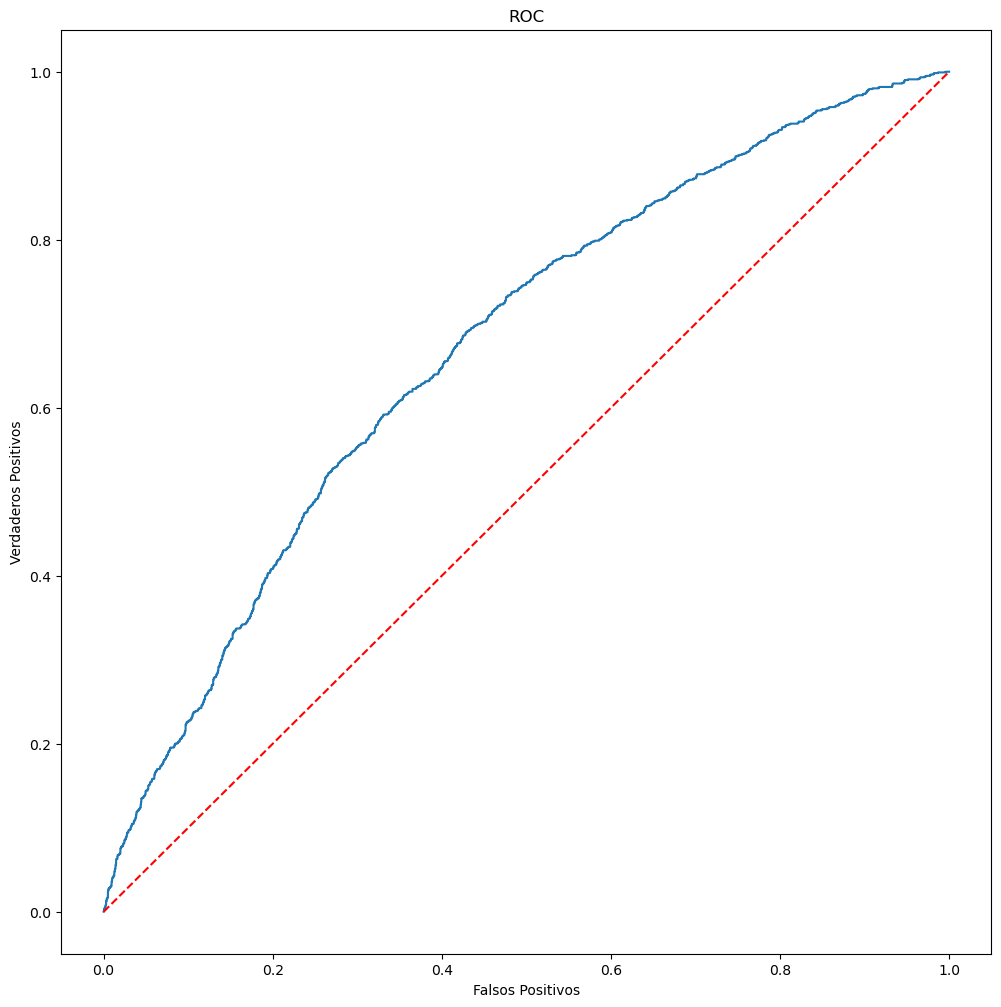

In [14]:
fpr, tpr, thrs = roc_curve(y_test, y_test_prob_lr[:, 1])
plt.figure(figsize=(12,12))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

In [15]:
auc = roc_auc_score(y_test, y_test_prob_lr[:, 1])
print("- Precision:", round(precision_score(y_test, y_test_pred_lr),2))
print("- Recall:", recall_score(y_test, y_test_pred_lr))
print("- Fscore:", round(f1_score(y_test, y_test_pred_lr),2))
print("- AUC:", round(auc,2))


- Precision: 0.55
- Recall: 0.1508656224237428
- Fscore: 0.24
- AUC: 0.67


### 3.2. Modelo ensamblado

[Bagging](http://eio.usc.es/pub/mte/descargas/ProyectosFinMaster/Proyecto_1686.pdf)

In [16]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_test_pred_rfc = rfc.predict(x_test)
y_test_prob_rfc = rfc.predict_proba(x_test)

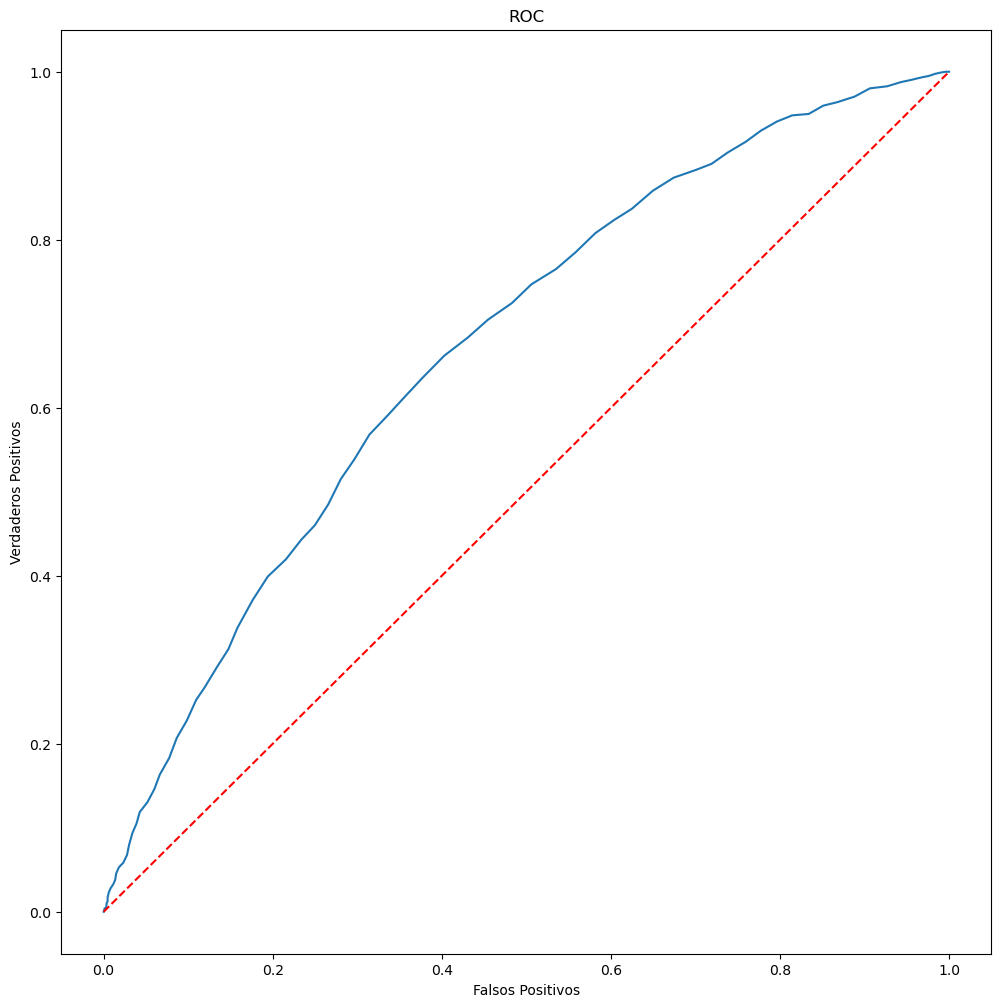

In [17]:
fpr, tpr, thrs = roc_curve(y_test, y_test_prob_rfc[:, 1])
plt.figure(figsize=(12,12))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

In [18]:
auc = roc_auc_score(y_test, y_test_prob_rfc[:, 1])
print("- Precision:", round(precision_score(y_test, y_test_pred_rfc),2))
print("- Recall:", recall_score(y_test, y_test_pred_rfc))
print("- Fscore:", round(f1_score(y_test, y_test_pred_rfc),2))
print("- AUC:", round(auc,2))


- Precision: 0.5
- Recall: 0.22753503709810388
- Fscore: 0.31
- AUC: 0.67


### 3.3. Red neuronal (MLP)

## 4. Segmentación de clientes

In [19]:
km = KMeans(n_clusters=2, random_state=0)
km = km.fit_predict(x_estandarizado)
km

c:\Users\sergi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 0, 0, 0])

In [20]:
rfc_cluster = LogisticRegression()
rfc_cluster.fit

<bound method LogisticRegression.fit of LogisticRegression()>

[KMeans clustering](https://www.kaggle.com/code/micheldc55/introduccion-al-clustering-con-python-y-sklearn)

[El algoritmo k-means](https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans)

## 5. Tratamiento y análisis de la columna Mes.

Número de outliers por encima: 0
Número de outliers por debajo: 0


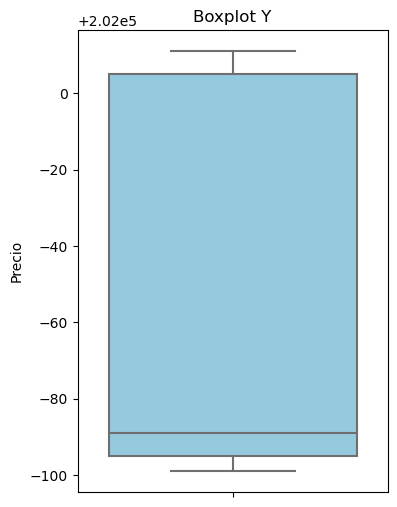

<class 'pandas.core.series.Series'>
RangeIndex: 20000 entries, 0 to 19999
Series name: MES
Non-Null Count  Dtype         
--------------  -----         
20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 156.4 KB


count                         20000
mean     2019-11-05 06:08:21.120000
min             2019-01-01 00:00:00
25%             2019-05-01 00:00:00
50%             2019-11-01 00:00:00
75%             2020-05-01 00:00:00
max             2020-11-01 00:00:00
Name: MES, dtype: object

In [21]:
# Calculamos los cuantiles y el IQR
Q1 = df['MES'].quantile(0.25)
Q3 = df['MES'].quantile(0.75)
IQR = Q3 - Q1

# Calculamos los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificamos outliers por encima y por debajo de los límites
outliers_above = df['MES'][df['MES'] > upper_bound]
outliers_below = df['MES'][df['MES'] < lower_bound]

print("Número de outliers por encima:", outliers_above.shape[0])
print("Número de outliers por debajo:", outliers_below.shape[0])

# Boxplot vertical
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['MES'], color='skyblue', orient='v')
plt.ylabel('Precio')
plt.title('Boxplot Y')
plt.show()

df['MES'] = pd.to_datetime(df['MES'], format='%Y%m')

df['MES'].info()

df['MES'].describe()

- [pandas.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

- [Float Python](https://ellibrodepython.com/float-python)

 - Documentación vista en clase (Regresion_PrecioDiamantes.ipynb)